# Assignment 2 - Machine Learning Basics

## *Ashwini Marathe*
Netid:  *asm105*

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
- Understand the bias-variance tradeoff and the impact of model flexibility algorithm performance and model selections

In [214]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
%config InlineBackend.figure_format = 'retina'

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**
1. When the sample size *n* is extremely large and number of predictors *p* is small, a flexible method will do better as *p* << *n*, even when using all the predictors our system will be highly over determined.

2. When the opposite is true, inflexible methods would generally perform better, as too flexible models might overfit the data

3. In this case, inflexible models might not be able to capture the complex relationships and hence flexible methods will generally perform better

4. When the variance of the erros terms is extremely high, highly flexible methods might draw patterns from error and hence can perform bad. So, in this case inflexible models will generally perform better

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

### **ANSWER**

* - Here we want to analyze the factor affecting CEO's salary which is a continuous variable and hence this is a regression problem
  - We are interested in inference as our goal if to infer what affects CEO's salary
  - *n* = 500, *p* = 3
  
* - This is a classification problem as we wish to know whether a new product will be a success or a failure
  - Our aim here is prediction because we want to know if the product will be a success or failure
  - *n* = 20, *p* = 13
  
* - We are interesting in predicting the % change in the US dollar which is a continuous variable and hence this is a regression problem
  - Since we are interested in predicting, this is a prediction problem
  - *n* = 52, *p* = 3
 

# Practical Questions

## 3
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [215]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

euclidean_distance = []    ## array to store euclidean distances
for i in range(X.shape[0]):
    dist = np.sqrt(sum([x**2 for x in (X[i]-[0,0,0])]))
    euclidean_distance.append(dist)
       


**(a)** Euclidean distance between each observation and the test point

| Obs. | Dist  | 
|------|-------
| **1**| 3.0   | 
| **2**| 2.0   | 
| **3**| 3.16  | 
| **4**| 2.23  | 
| **5**| 1.41  | 
| **6**| 1.73  | 

**(b)** For *k*=1, we find the nearest one neighbor which is observation 5 with a minimum euclidean distance from test point of 1.41 units. So our prediction will be **Blue**

**(c)** For *k*=3, the nearest 3 neighbors are observation 5, 6 and 2. And our prediction will be decided a majority vote from these three neighbors. Hence our prediction in this case will be **Red**

**(d)** Smaller values of *k* makes jagged boundaries and higher values make smoother boudaries. So if the Bayesian decision boundary is highly non-linear, higher values of *k* might not be able to capture it and smaller values of *k* might work better

**ANSWER**:

## 4
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

**(a)** Code for KNN is given below:

In [230]:
# (a) Write your own kNN classifier
from statistics import mode
import numpy
from scipy.spatial import distance

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.X = None
        self.y = None
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.X = x
        self.y = y
        
    def predict(self, x, k):
        y_hat = []
        for i in range(len(x)):    ## for each row in test set
            diff = np.array(self.X - x.iloc[i]) # create an array of differences with each training point
            dist = numpy.linalg.norm(np.array(self.X - x.iloc[i]), axis=1) # take euclidean dist
            sorted_index = np.argsort(dist)
            top_k = sorted_index[:k]  # find the top k
            y_hat.append(mode((self.y).iloc[top_k]))
        return y_hat

    
# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [231]:
import pandas as pd
import time

x_train_low = pd.read_csv("./data/A2_X_train_low.csv", header=None)
y_train_low = pd.read_csv("./data/A2_y_train_low.csv", header=None)[0]

x_test_low = pd.read_csv("./data/A2_x_test_low.csv", header=None)
y_test_low = pd.read_csv("./data/A2_y_test_low.csv", header=None)[0]

x_test_high = pd.read_csv("./data/A2_x_test_high.csv", header=None)
y_test_high = pd.read_csv("./data/A2_y_test_high.csv", header=None)[0]

x_train_high = pd.read_csv("./data/A2_X_train_high.csv", header=None)
y_train_high = pd.read_csv("./data/A2_y_train_high.csv", header=None)[0]

knn = Knn()
knn.fit(x_train_low, y_train_low)
t_start = time.time()
y_knn_test_low = knn.predict(x_test_low, 5)
t_end = time.time()
print("(c)")
print(f"Time taken to train low dimensional data: {t_end-t_start}sec")
print(f"Accuracy of low dimensional data: {accuracy(y_test_low, y_knn_test_low)}")

knn.fit(x_train_high, y_train_high)
t_start = time.time()
y_knn_test_high = knn.predict(x_test_high, 5)
t_end = time.time()
print(f"Time taken to train high dimensional data: {t_end-t_start}sec")
print(f"Accuracy of low dimensional data: {accuracy(y_test_high, y_knn_test_high)}")

(c)
Time taken to train low dimensional data: 2.154448986053467sec
Accuracy of low dimensional data: 0.925
Time taken to train high dimensional data: 34.63590097427368sec
Accuracy of low dimensional data: 0.993


In [232]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train_low, y_train_low)
t_start = time.time()
low_sklearn = neigh.predict(x_test_low)
t_end = time.time()

print("(d)")
print(f"Time taken to train low dimensional test data: {t_end-t_start}sec")
print(f"Accuracy of low dimensional data: {accuracy(low_sklearn, y_test_low)}")


neigh.fit(x_train_high, y_train_high)
t_start = time.time()
high_sklearn = neigh.predict(x_test_high)
t_end = time.time()
print(f"Time taken to train high dimensional test data: {t_end-t_start}sec")
print(f"Accuracy of low dimensional data: {accuracy(high_sklearn, y_test_high)}")
print("The accuracy is same for both KNN implementation. However, for the low dimensional data set the sklearn method is approximately 71 times faster and for the high dimensional data set is approximately 215 times faster")

(d)
Time taken to train low dimensional test data: 0.03316187858581543sec
Accuracy of low dimensional data: 0.925
Time taken to train high dimensional test data: 0.16351890563964844sec
Accuracy of low dimensional data: 0.993
The accuracy is same for both KNN implementation. However, for the low dimensional data set the sklearn method is approximately 71 times faster and for the high dimensional data set is approximately 215 times faster


**(e)** A lot of predictions are required real time wherein pretrained models which take very low prediction time are used. If for every prediction a lot of time is required the predictions cannot be real time. Hence such methods cannot be used in real-time applications.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

**(a)** Synthetic dataset is created in the code snippet below.

(b)


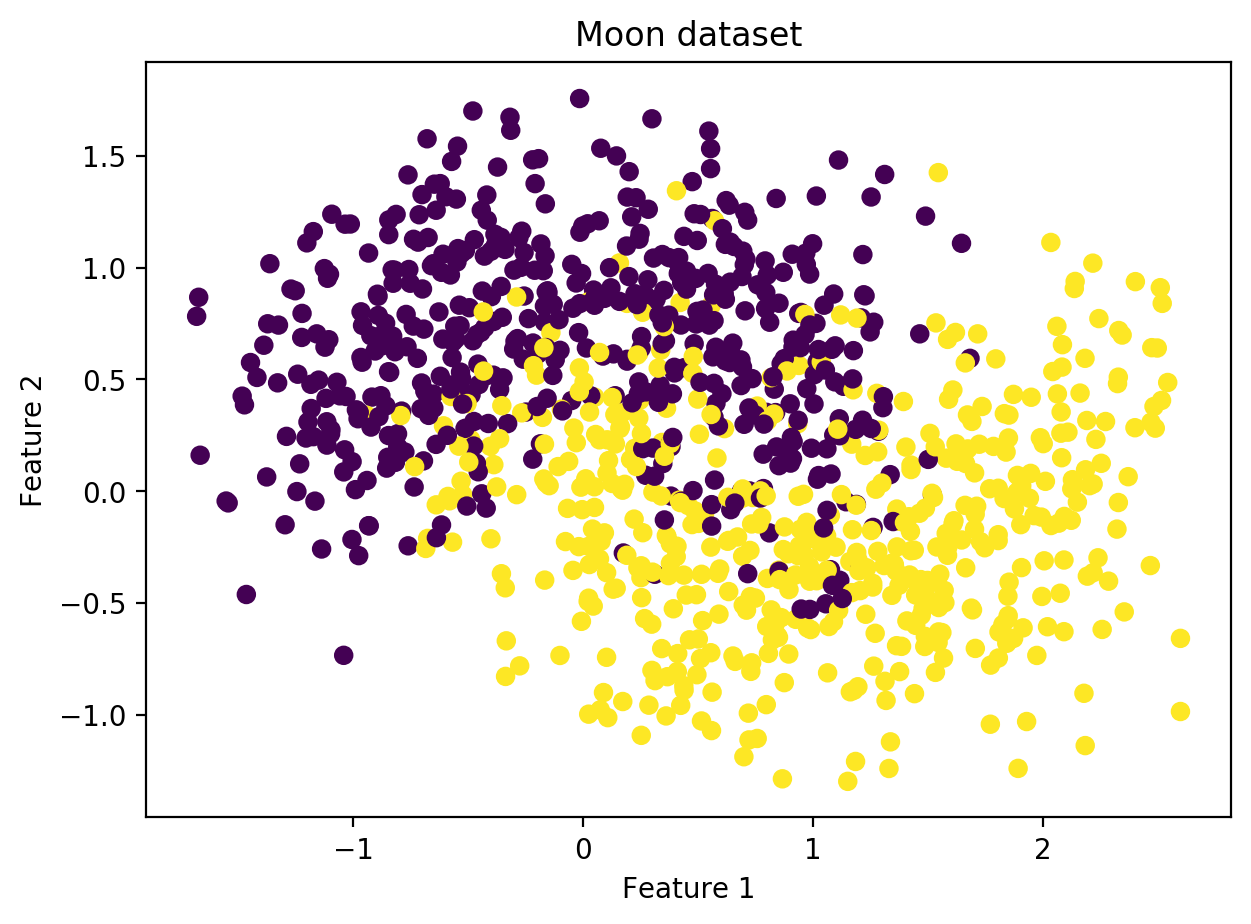

In [220]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

synthetic_data_x, synthetic_data_y = make_moons(n_samples=1000, noise=0.35)
#syn_x = synthetic_data[0]
#syn_y = synthetic_data[1]
print("(b)")

plt.figure(figsize=(7,5), dpi= 100) 
plt.scatter(x=syn_x[:,0], y=syn_x[:,1], c=syn_y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Moon dataset")
plt.show()

**(c)** In the code snippet below three datasets are sampled from our dataset and KNN classifer is fitted for $k$ in $[1,5,25]$

(d)


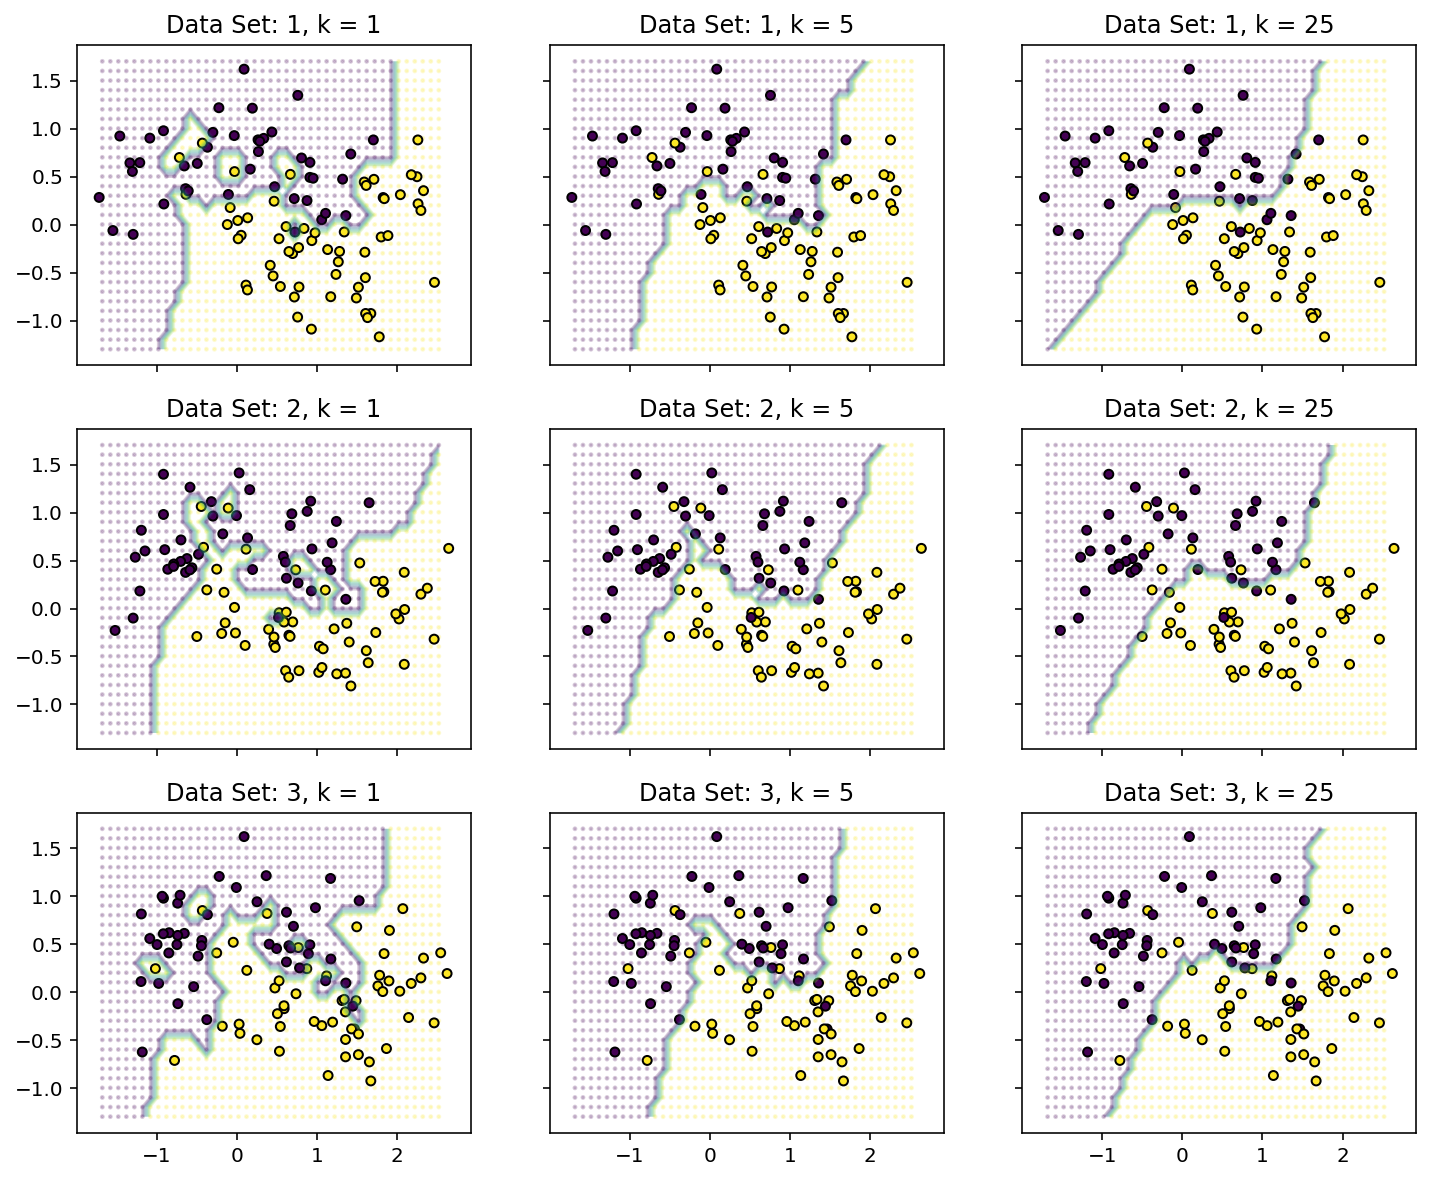

In [221]:
from numpy.random import choice
import random
from itertools import product

random.seed(2)

index_1 = choice(range(1000), size=100, replace = False)
index_2 = choice(range(1000), size=100, replace = False)
index_3 = choice(range(1000), size=100, replace = False)

total_data = {"x_1":synthetic_data_x[index_1], "y_1":synthetic_data_y[index_1],
             "x_2":synthetic_data_x[index_2], "y_2":synthetic_data_y[index_2],
             "x_3":synthetic_data_x[index_3], "y_3":synthetic_data_y[index_3]}

x_min, x_max = synthetic_data[0][:,0].min(), synthetic_data[0][:,0].max()
y_min, y_max = synthetic_data[0][:,1].min(), synthetic_data[0][:,1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(12, 10))

print("(d)")

for idx, pos in zip(product(["1", "2", "3"], [1, 5, 25]), product([0,1,2],[0,1,2])):                
    
    clf = KNeighborsClassifier(n_neighbors=idx[1])
    X = total_data["x_"+idx[0]]
    y = total_data["y_"+idx[0]]
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    tt = "Data Set: "+idx[0] + ", k = "+str(idx[1])
    axarr[pos[0], pos[1]].contour(xx, yy, Z, alpha=0.2)
    axarr[pos[0], pos[1]].scatter(x=xx, y=yy, c=Z, s=2, alpha=0.2)
    axarr[pos[0], pos[1]].scatter(x=np.array(X)[:, 0], y=np.array(X)[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[pos[0], pos[1]].set_title(tt)

plt.show()

**(e)** The decision boundary seperated by *k* = 1 is the best in segregating the data. However, we can see in column 1 of the figure above which represents *k* = 1 that the boundary is very jagged. With changing dataset the boundaries change a lot.Whereas for *k*=25 (column 3) the boundary is smoother, and does not vary a lot as the datasets change. However, the errors are also higher for *k*=25.

**(f)** From the above example we see that for lower value of *k*, the bias is low (we make accurate predistions) however the decision boundary varies a lot across the three datasets indicating that the variance is high. On the other hand for higher *k*, the bias is higher but the decision boundaries do not chnage a lot for different datasets, indicating lower variance. Thus, we see that lower *k* has lower bias, higher variance and high *k* has higher bias, lower variance

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

**(a)** and **(b)**

In [222]:
synthetic_data_test = make_moons(n_samples=1000, noise=0.35)
synthetic_data_test_x = synthetic_data_test[0]
synthetic_data_test_y = synthetic_data_test[1]

synthetic_data_train_x = synthetic_data[0]
synthetic_data_train_y = synthetic_data[1]

train_err = []
test_err = []

for i in range(1,501):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(synthetic_data_train_x, synthetic_data_train_y)
    predicted_train = clf.predict(synthetic_data_train_x)
    predicted_test = clf.predict(synthetic_data_test_x)
    train_err.append(1 - accuracy(predicted_train, synthetic_data_train_y))
    test_err.append(1 - accuracy(predicted_test, synthetic_data_test_y))

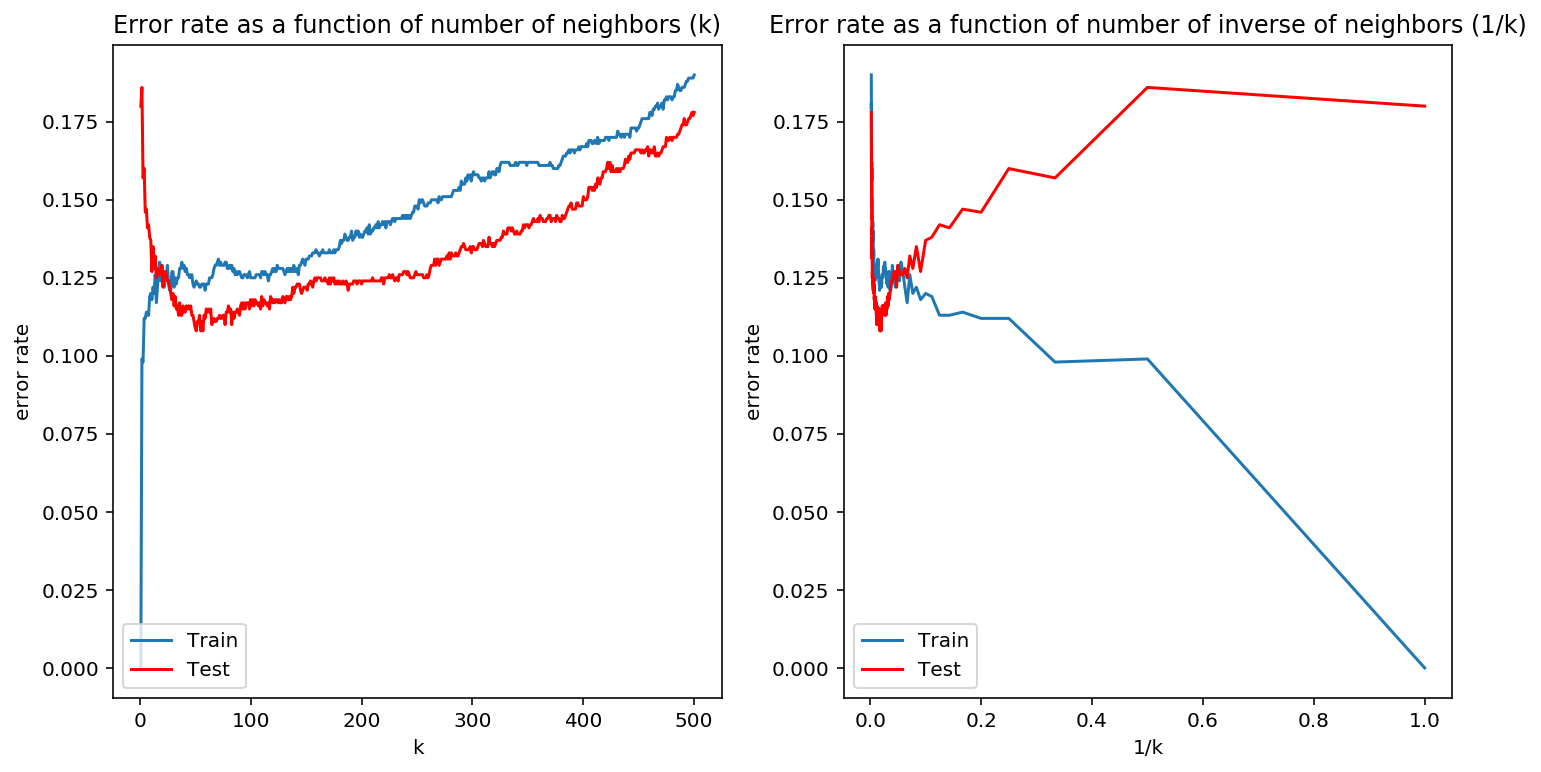

In [223]:
f, axarr = plt.subplots(1, 2, figsize=(12, 6))

# error vs. k plot
k_inv = [1/x for x in range(1,501)]
axarr[0].plot(range(1,501), train_err, label = "Train")
axarr[0].plot(range(1,501), test_err, c="red", label = "Test")
axarr[0].set_xlabel("k")
axarr[0].set_ylabel("error rate")
axarr[0].set_title("Error rate as a function of number of neighbors (k)")
axarr[0].legend(loc="lower left")

# error vs. (1/k) plot
axarr[1].plot(k_inv, train_err, label = "Train")
axarr[1].plot(k_inv, test_err, c="red", label = "Test")
axarr[1].set_xlabel("1/k")
axarr[1].set_ylabel("error rate")
axarr[1].set_title("Error rate as a function of number of inverse of neighbors (1/k)")
axarr[1].legend(loc="lower left")

plt.show()

**(c)** From the plots above we see that training error is very low as values k less than 5. But the error gets higher above those values of k. The test error however reaches a low at k = 50 and increases from there. Test eror is much higher av values of k less than 5. This indicates that for such small values of k, the model overfits the data.  

**(d)** Lower values of *k* represents lower bias but higher variance and higher values of *k* represents higher bias but lower variance.

**(e)** The optimal value of *k* is 50 as at this value 0f *k*, the test error is minimum.

**(f)** In linear and logistic regression, including higher orders of features changes the flexibility of the model. In other non-parametric model like random forests, the depth of the tree changes the flexibility of the model.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given training and testing data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

**ANSWER**

(a)


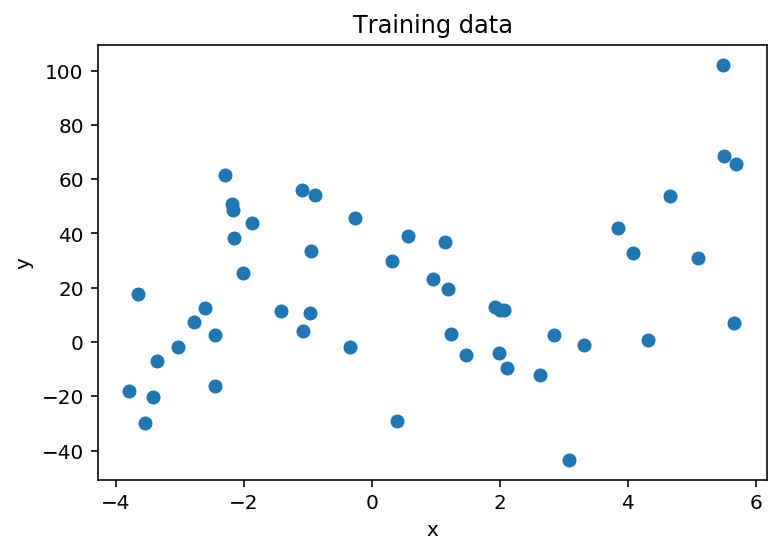

In [189]:
train = pd.read_csv("./data/A2_Q7_train.csv",usecols=("x","y"))
test = pd.read_csv("./data/A2_Q7_test.csv",usecols=("x","y"))
print("(a)")
plt.scatter(x=train.x, y=train.y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training data")
plt.show()

In [233]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit((np.array(train.x)).reshape(-1,1), np.array(train.y))
r_sq = reg.score((np.array(train.x)).reshape(-1,1), train.y)
mse = mean_squared_error(train.y, reg.predict((np.array(train.x)).reshape(-1,1)))
intercept = reg.intercept_
slope = reg.coef_

**(b)** The equation of the line is $y = 2.59*x + 17.2$. The $R^2$ value for regression is $0.0649$ and the mean squared error is 791.42

In [77]:
x_train = train
x_train["sinx"] = [np.sin(x) for x in x_train.x]
x_train["cube"] = [x*x*x for x in x_train.x]
y_train = np.array(train.y)
x_train.drop("y", axis=1, inplace=True)

In [190]:
reg_2 = LinearRegression().fit(x_train, np.array(y_train))
r_sq = reg_2.score(x_train, y_train)
mse = mean_squared_error(y_train, reg_2.predict(x_train))
intercept = reg_2.intercept_
slope = reg_2.coef_

**(c)** The new model is given by the equation, $y = -2.268*x - 11.29*sin(x) + 0.28* x^3 + 12.7$, $R^2$ value is 0.065, Mean square error is 791.417

(d)


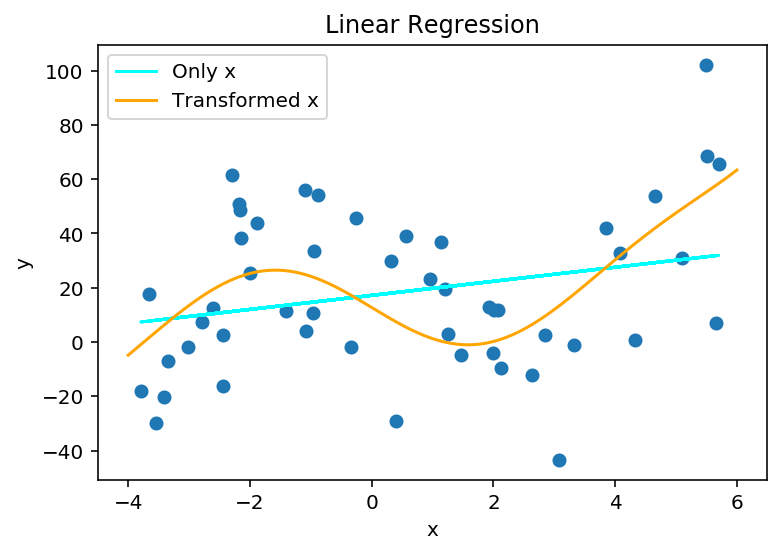

In [191]:
r = np.linspace(-4, 6, 5000)

print("(d)")
plt.scatter(train.x, y_train)
plt.plot(train.x, 2.59*(train.x)+17.2, c="cyan", label= "Only x")
plt.plot(r, -2.268*(r) - (11.292*np.sin(r)) + (0.283*r*r*r) + 12.73, c="orange", label="Transformed x")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.show()

In [192]:
x_test = test
x_test = x_test.drop("y", axis=1)
x_test["sinx"] = [np.sin(x) for x in x_test.x]
x_test["cube"] = [x*x*x for x in x_test.x]
y_test = np.array(test.y)

In [242]:
r_sq_2 = reg_2.score(x_test, y_test)
mse_2 = mean_squared_error(y_test, reg_2.predict(x_test))

test = (np.array(x_test.x)).reshape(-1, 1)
r_sq = r2_score(y_test, reg.predict(test))
mse = mean_squared_error(y_test, reg.predict(test))

**(e)** 
- $R^2$ and mean squared error for the test dataset for model 1 is -0.133 and 1116.663 respectively.

- $R^2$ and mean squared error for the test dataset for model 2 is -0.017 and 1002.587 respectively.

**(f)** Model 1 does not perform better either on test or train data. The $R^2$ value is lower and MSE is higher for model 1 for both train and test data. Model 2 performs much better on both, the train as well as test dataset. The plot below shows the model 2 curve with train as well as test data plotted

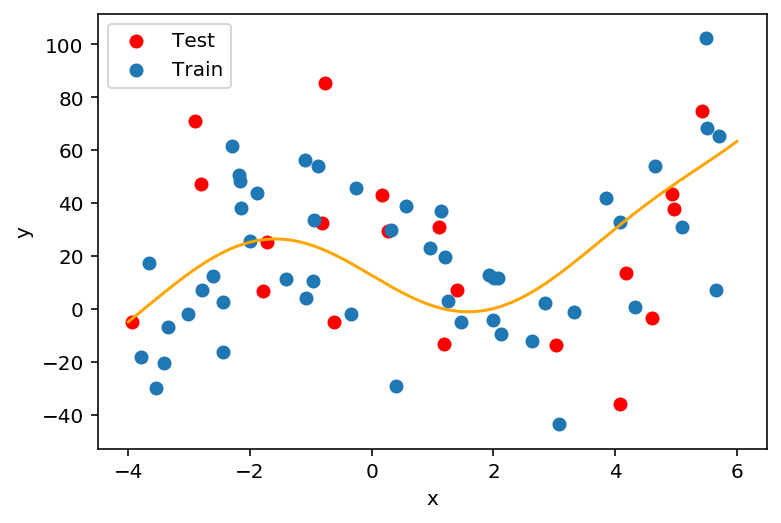

In [225]:
plt.scatter(x_test.x,y_test, label="Test", c="red")
plt.scatter(x_train.x, y_train, label="Train")
plt.plot(r, -2.268*(r) - (11.292*np.sin(r)) + (0.283*r*r*r) + 12.73, c="orange")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**(g)** If the test data was very different from train data, the model that fits well to the training data will perform bad on test data. This might lead to us concluding that the the model is overfitting on the training data, however that is not the case. Th model does not fit well as the test data is very different from the test data. As a result we will be misled into believing that the model is overfitting. Hence the training and test data must be similar and should come from same/similar distributions. 